<a href="https://colab.research.google.com/github/yopi1838/CR-Jupyter-Exercise/blob/master/Beam_elastic_3d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

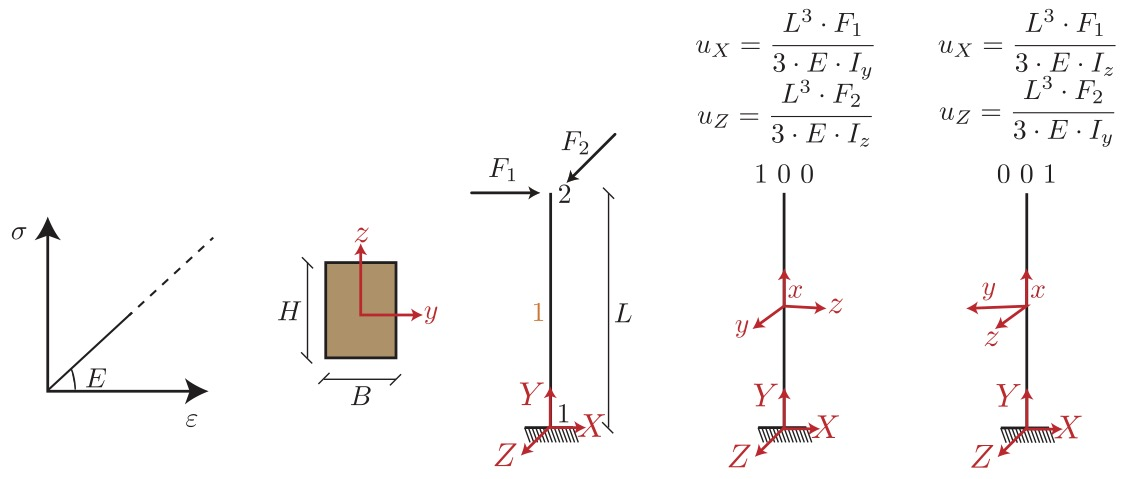

In [7]:
#%% TITLE
# ------------------------------
# 3D Clamped Beam (Linear and Elastic)
# Units: N, m, sec

!pip install openseespy
!pip install opsvis

#%% IMPORT PACKAGES
import openseespy.opensees as ops
import opsvis as opsv
import os
import matplotlib.pyplot as plt
import numpy as np

In [8]:
#%% INITIALIZE
# Remove existing model:
ops.wipe()
# Create data directory:
DataDir = r'Output'
if not os.path.exists(DataDir):
    os.makedirs(DataDir)

In [9]:
#%% INPUTS
# Define length:
L=3.2
# Define cross-section:
B=0.05
H=0.1
# Define elastic modulus
E=2.1e10
# Define the Poisson coefficients
ni=0.2
# Set Shear Modulus and torsional moment of inertia of cross section
G=E/(2+(1+ni))
# Compute Area and Inertia
A=B*H
Iy=1./12.*B*H**3
Iz=1./12.*H*B**3
J=pow(Iy,2)+pow(Iz,2)
# Set the horizontal force
F1=1000
F2=1000

In [10]:
#%% MODEL
# Create ModelBuilder (with two-dimensions and 3 DOF/node):
ops.model('basic', '-ndm', 3, '-ndf', 6) #ux,uy,uz,rx,ry,rz
# Create nodes:
ops.node(1, 0., 0., 0.)
ops.node(2, 0., L, 0.)
# Set the boundary conditions:
ops.fix(1, 1, 1, 1, 1, 1, 1)
ops.fix(2, 0, 0, 0, 0, 0, 0) #useless because when defining nodes, the constraints are immediately freed
# Define elements:
# Define geometric transformation:
ops.geomTransf('Linear', 1, 1, 0, 0) #vector parallel to xz is parallel to the positive x axis
# Create the element:
ops.element('elasticBeamColumn', 1, 1, 2, A, E, G, J, Iy, Iz, 1)

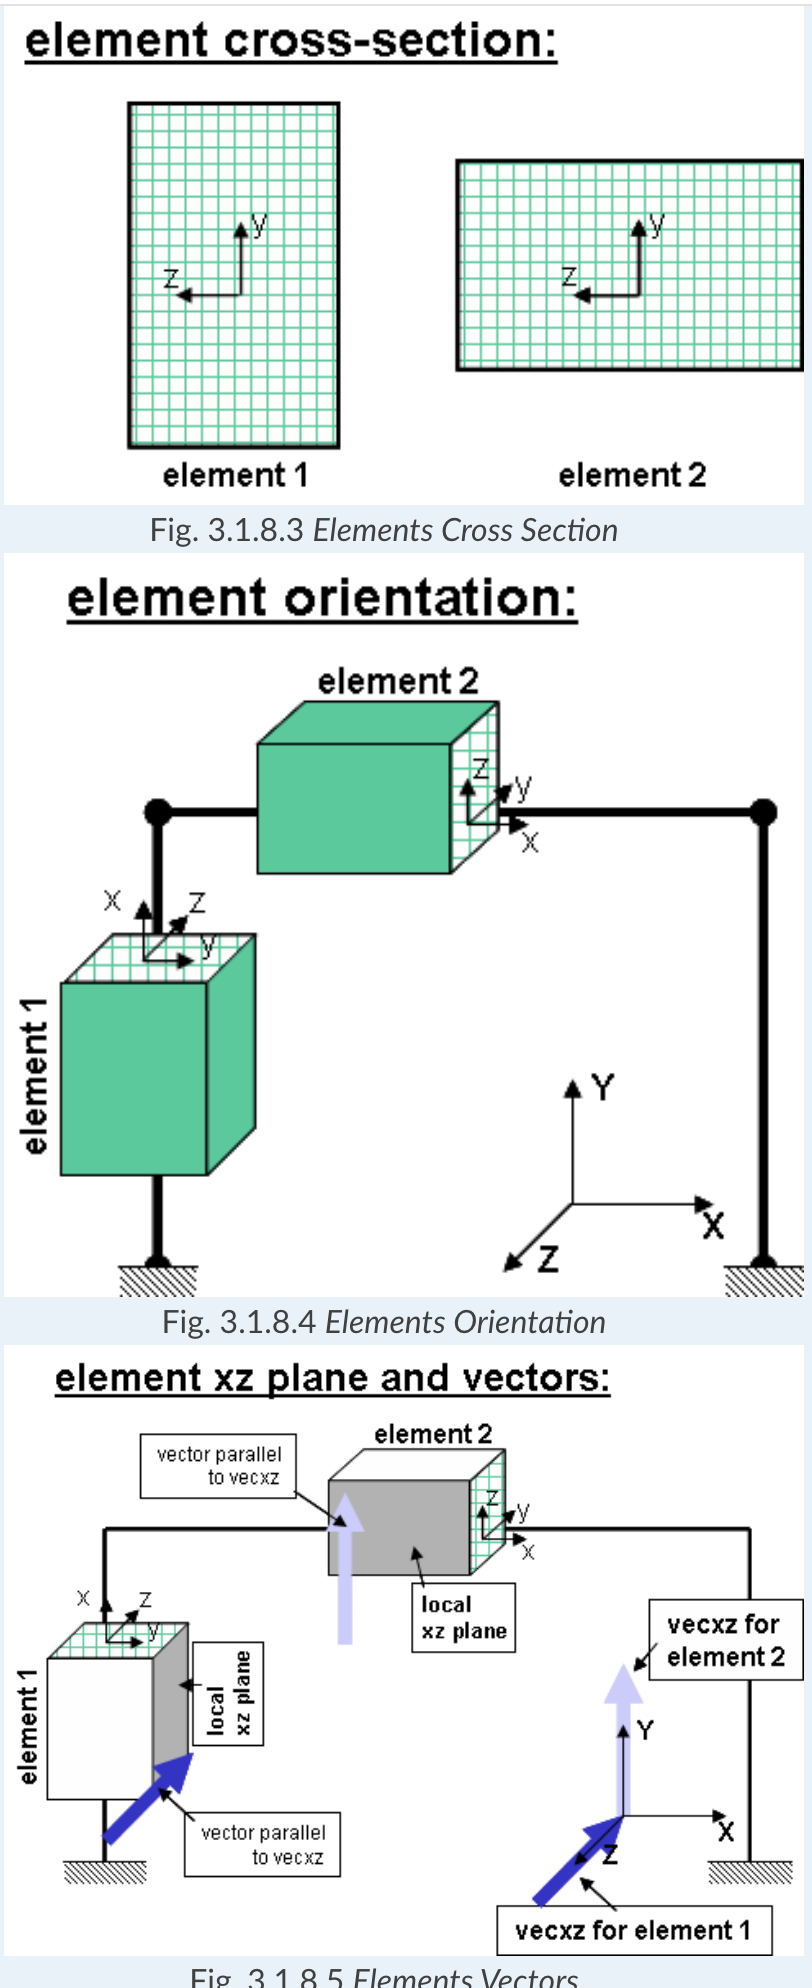

[Geometric transformation](https://opensees.github.io/OpenSeesDocumentation/user/manual/model/geomTransf/Linear.html)

In [11]:
#%% LOADS
# Create a Linear TimeSeries:
#timeSeries Linear 1
ops.timeSeries('Linear', 1)
# Create a Plain load pattern with a linear TimeSeries:
ops.pattern('Plain', 1, 1)
# Create the loads in the linear pattern
ops.load(2, F1, 0., F2, 0, 0, 0)

In [12]:
#%% ANALYSIS
# Analysis definitions:
# Create the constraint handler, a Plain handler is used as homo constraints:
ops.constraints('Plain')
# Create the DOF numberer, the plain algorithm is used:
ops.numberer('Plain')
# Create the system of equation, a SPD using a band storage scheme:
ops.system('BandSPD')
# Create the solution algorithm, a Linear algorithm is created:
ops.algorithm('Linear')
# Create the integration scheme, the LoadControl scheme using steps of 1.0:
ops.integrator('LoadControl', 1)
# create the analysis object:
ops.analysis('Static')
# Perform the analysis (1 step):
ops.analyze(1)

0

U_Y is: 0.12483047619047619 mm VS 0.12483047619047623 mm
U_Z is: 0.49932190476190474 mm VS 0.4993219047619049 mm


Text(0.5, 0.92, 'Torsional moment T, max = 0.00, min = 0.00')

<Figure size 640x480 with 0 Axes>

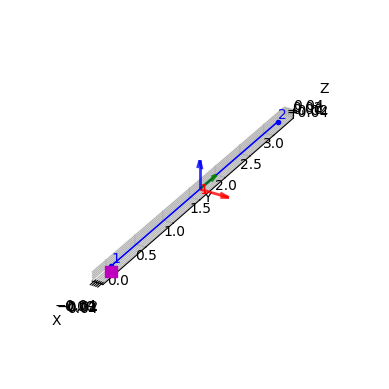

<Figure size 640x480 with 0 Axes>

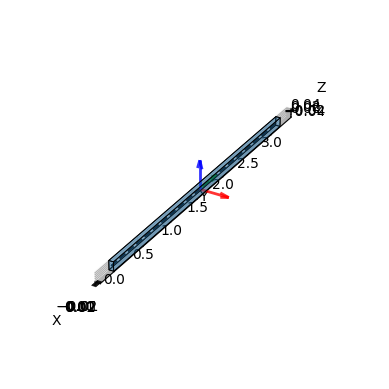

<Figure size 640x480 with 0 Axes>

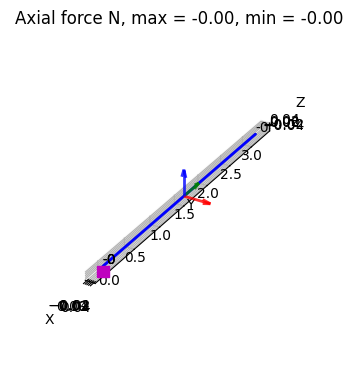

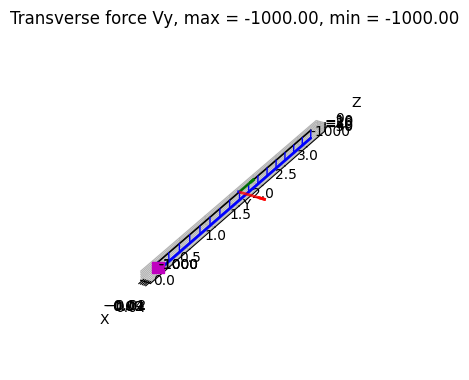

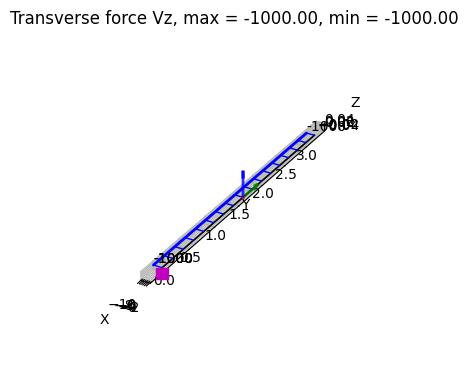

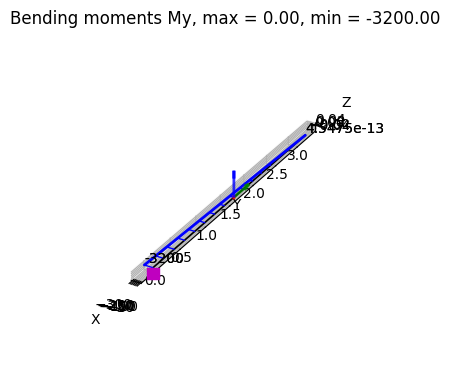

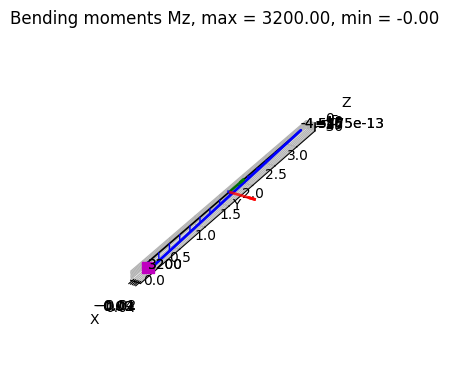

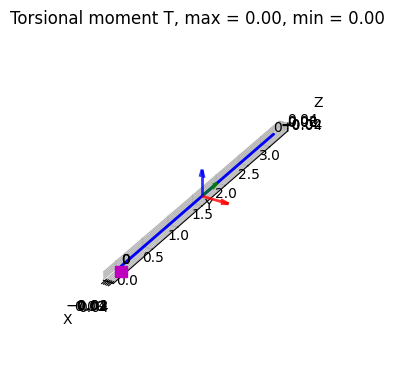

In [13]:
#%% SCREEN PRINT
# Print the model
#ops.printModel()
# Compare with the known displacement for a cantilever beam

disp_y=(F1*L**3)/(3*E*Iy)
disp_z=(F2*L**3)/(3*E*Iz)
print("U_Y is: "+str(disp_y)+' mm VS '+ str(ops.nodeDisp(2)[0])+ " mm")
print("U_Z is: "+str(disp_z)+' mm VS '+ str(ops.nodeDisp(2)[2])+ " mm")

# 0. plot model with tag lebels
fig = plt.figure()
opsv.plot_model()

# 1. plot_extruded_model
fig = plt.figure()
ele_shapes = {1: ['rect', [B, H]]}
opsv.plot_extruded_shapes_3d(ele_shapes)

# 2. plot deformed model
plt.figure()
sfac = 1.
#opsv.plot_defo(sfac, 10, endDispFlag=0)

# 3. plot N, V, M forces diagrams
sfacN = 1.e-2
sfacVy = 5.e-2
sfacVz = 1.e-2
sfacMy = 1.e-1
sfacMz = 1.e-2
sfacT = 1.e-2

# plt.figure()
minY, maxY, _ = opsv.section_force_diagram_3d('N', sfacN)
plt.title(f'Axial force N, max = {maxY:.2f}, min = {minY:.2f}')

minY, maxY, _ = opsv.section_force_diagram_3d('Vy', sfacVy)
plt.title(f'Transverse force Vy, max = {maxY:.2f}, min = {minY:.2f}')

minY, maxY, _ = opsv.section_force_diagram_3d('Vz', sfacVz)
plt.title(f'Transverse force Vz, max = {maxY:.2f}, min = {minY:.2f}')

minY, maxY, _ = opsv.section_force_diagram_3d('My', sfacMy)
plt.title(f'Bending moments My, max = {maxY:.2f}, min = {minY:.2f}')

minY, maxY, _ = opsv.section_force_diagram_3d('Mz',sfacMz)
plt.title(f'Bending moments Mz, max = {maxY:.2f}, min = {minY:.2f}')

minY, maxY, _ = opsv.section_force_diagram_3d('T', sfacT)
plt.title(f'Torsional moment T, max = {maxY:.2f}, min = {minY:.2f}')
